In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pickle
import numpy as np
import cv2
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
! pip install kss konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [15]:
# 한글만 있는 데이터
with open('/content/drive/MyDrive/프로젝트/data/KLyricSentenceDFFinal.p', 'rb') as f1:
    df = pickle.load(f1)

In [16]:
df

,title,artist,lyric,genre
0,내 손을 잡아,아이유,"[느낌이 오잖아, 떨리고 있잖아, 언제까지 눈치만 볼 거니, 네 맘을 말해봐, 딴청...",balad
1,너의 모든 순간 (Original),성시경,"[이윽고 내가 한눈에, 너를 알아봤을 때, 모든 건 분명 달라지고 있었어, 내 세상...",balad
2,Timeless,SG 워너비,"[어쩜 살아가다 보면, 한 번은 날 찾을지 몰라, 난 그 기대 하나로, 오늘도 힘겹...",balad
3,바람이 불었으면 좋겠어,길구봉구,"[웃는 모습이 너무 아름다운, 그런 너를 기억하면서, 괜찮아 넌 잘할거라 말하던, ...",balad
4,봄 사랑 벚꽃 말고,HIGH4 (하이포),"[길었던 겨우내 줄곧 품이 좀 남는, 밤색 코트, 그 속에 나를 쏙 감추고 걸음을,...",balad
...,...,...,...,...
3391,소녀,뮤뭉,"[손만 닿아도 떨어져버릴 것 같은, 꽃잎 같은 모습을 하고 있는 널 보았어, 아 소...",folk
3392,꿈처럼 이내 사라져 버리네,박연두,"[바람은 기억하고 있었고, 바다는 널 품에 안고 있었어, 우리는 늘 그렇듯 살며 잊...",folk
3393,과일가게총각,나날(NaaNaL),"[우리 동네 과일가게에서, 일하는 총각이 좋아, 갈색머리 우렁찬 목소리에, 나는 빠...",folk
3394,Attitude,이보람,"[빼곡히도 적어 놓았던, 알 수 없던 나의 생각들이, 점점 줄어드는 공간이, 마침표...",folk


In [17]:
# 가사를 한 문장으로 합쳐주기
for i in range(len(df)):
    df.iloc[i,2] = ' '.join(df.iloc[i,2])

In [22]:
# 오타 있던거 수정
df['genre'] = df['genre'].replace('balad', 'ballad')
df

,title,artist,lyric,genre
0,내 손을 잡아,아이유,느낌이 오잖아 떨리고 있잖아 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 피우지 ...,ballad
1,너의 모든 순간 (Original),성시경,이윽고 내가 한눈에 너를 알아봤을 때 모든 건 분명 달라지고 있었어 내 세상은 널 ...,ballad
2,Timeless,SG 워너비,어쩜 살아가다 보면 한 번은 날 찾을지 몰라 난 그 기대 하나로 오늘도 힘겹게 버틴...,ballad
3,바람이 불었으면 좋겠어,길구봉구,웃는 모습이 너무 아름다운 그런 너를 기억하면서 괜찮아 넌 잘할거라 말하던 또 그런...,ballad
4,봄 사랑 벚꽃 말고,HIGH4 (하이포),길었던 겨우내 줄곧 품이 좀 남는 밤색 코트 그 속에 나를 쏙 감추고 걸음을 재촉해...,ballad
...,...,...,...,...
3391,소녀,뮤뭉,손만 닿아도 떨어져버릴 것 같은 꽃잎 같은 모습을 하고 있는 널 보았어 아 소년은 ...,folk
3392,꿈처럼 이내 사라져 버리네,박연두,바람은 기억하고 있었고 바다는 널 품에 안고 있었어 우리는 늘 그렇듯 살며 잊고 더...,folk
3393,과일가게총각,나날(NaaNaL),우리 동네 과일가게에서 일하는 총각이 좋아 갈색머리 우렁찬 목소리에 나는 빠져버렸어...,folk
3394,Attitude,이보람,빼곡히도 적어 놓았던 알 수 없던 나의 생각들이 점점 줄어드는 공간이 마침표를 찍을...,folk


In [23]:
# df_ballad = df[df.genre == 'balad']
# df_dance = df[df.genre == 'dance']
# df_hiphop = df[df.genre == 'hiphop']
# df_inde = df[df.genre == 'inde']
# df_folk = df[df.genre == 'folk']
# df_rnb = df[df.genre == 'rnb']
# df_rock = df[df.genre == 'rock']
# df_trot = df[df.genre == 'trot']

In [24]:
from konlpy.tag import Okt

In [27]:
contents_noun = {}
genre = 'ballad dance hiphop inde folk rnb rock trot'.split()

In [30]:
okt = Okt()
for g in genre:
    nouns = []
    for lyric in tqdm(df[df.genre == g]['lyric']):
        tkl = okt.nouns(lyric)
        tkl = [l for l in tkl if len(l) >= 2]
        nouns.extend(tkl)
    contents_noun[g] = nouns

100%|██████████| 601/601 [00:08<00:00, 68.19it/s]


In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [49]:
with open('contents_noun.p', 'wb') as f:
    pickle.dump(contents_noun, f)

In [ ]:
with open('/content/drive/MyDrive/프로젝트/이미지/contents_noun.p', 'rb') as f:
    contents_noun = pickle.load(f)

In [32]:
st_w = []

In [33]:
text = {}
for g in genre:
    clean_text = [word for word in contents_noun[g] if word not in st_w]
    text[g] = ' '.join(clean_text)

In [41]:
img_path = '/content/drive/MyDrive/프로젝트/이미지/헤드셋2.png'
img = np.array(cv2.imread(img_path))

ballad


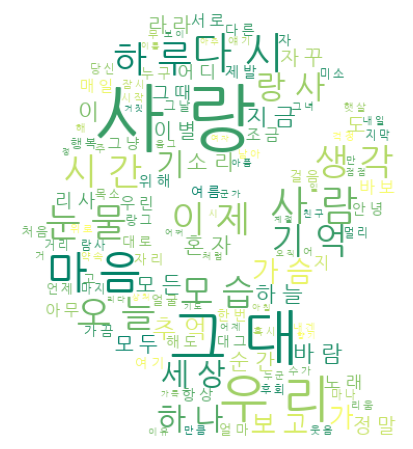


dance


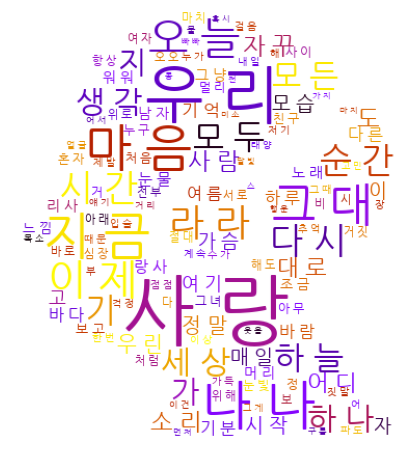


hiphop


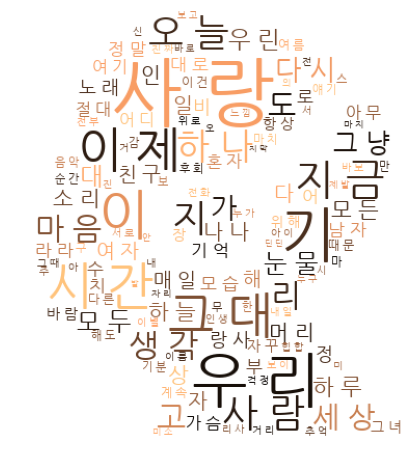


inde


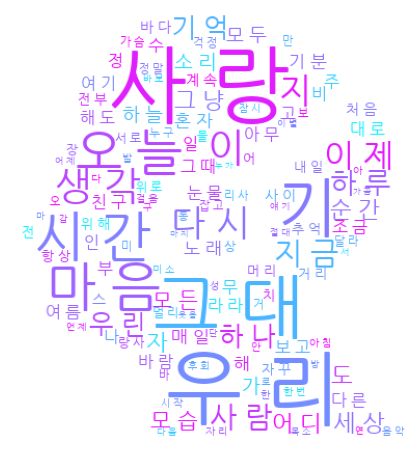


folk


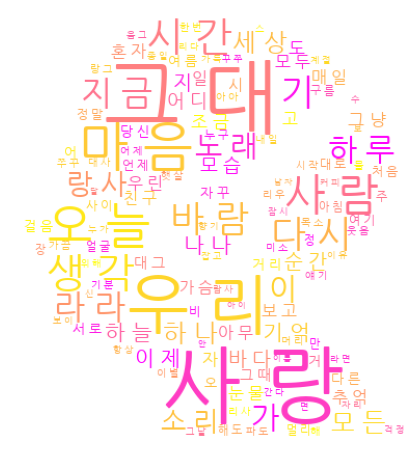


rnb


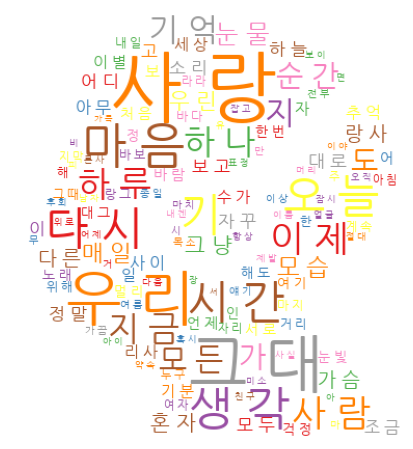


rock


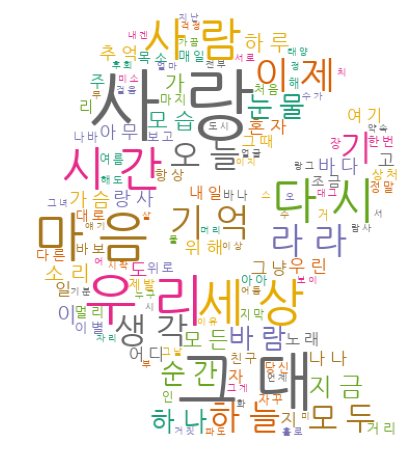


trot


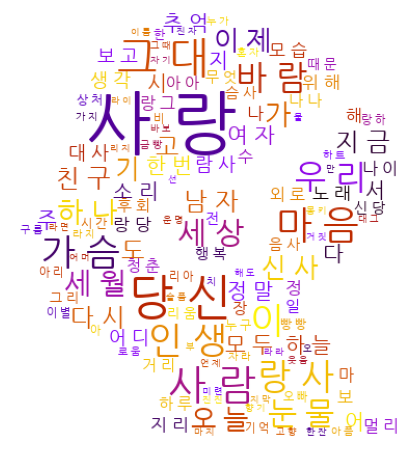

In [47]:
palettes = ['summer', 'gnuplot', 'copper','cool', 'spring', 'Set1', 'Dark2', 'gnuplot']
for i in range(8):
    print(genre[i])
    wordcloud = WordCloud(font_path ="NanumGothic",  mask = img,
                background_color = 'white', width=460, height=432,
                prefer_horizontal = True, max_words = 130,
                colormap = palettes[i]).generate(' '.join(text[genre[i]]))
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    print()